<a href="https://colab.research.google.com/github/aribamazharam/efficient-net/blob/main/Birds_EfficientNetb0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00


In [3]:
import os
import timm
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [4]:
path_to_data = '/content/drive/MyDrive/Fenris'

In [7]:
import zipfile

# Replace 'dataset.zip' with the actual name of your uploaded ZIP file
zip_file_path = '/content/drive/MyDrive/Fenris/archive.zip'

# Replace '/content/dataset' with the desired path where you want to extract the contents
destination_folder = '/content/drive/MyDrive/Fenris'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Dataset has been successfully unzipped.")

Dataset has been successfully unzipped.


In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ImageFolder(os.path.join(path_to_data, 'train'), transform=transform)
val_dataset = ImageFolder(os.path.join(path_to_data, 'valid'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = timm.create_model('efficientnet_b0', pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, len(train_dataset.classes))
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score

train_loss_list = []
train_acc_list = []
train_precision_list = []
train_recall_list = []

val_loss_list = []
val_acc_list = []
val_precision_list = []
val_recall_list = []

for epoch in range(20):
    train_loss = 0.0
    train_correct = 0
    train_labels, train_preds = [], []

    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)

        _, preds = torch.max(outputs, 1)
        train_correct += torch.sum(preds == labels.data)
        train_labels.extend(labels.cpu().numpy())
        train_preds.extend(preds.cpu().numpy())

    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = train_correct.double() / len(train_loader.dataset)
    train_precision = precision_score(train_labels, train_preds, average='macro')
    train_recall = recall_score(train_labels, train_preds, average='macro')

    train_loss_list.append(train_loss)
    train_acc_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)

    model.eval()
    val_labels, val_preds = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(preds.cpu().numpy())

    val_loss = criterion(outputs, labels)
    val_loss_list.append(val_loss.item())

    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds, average='macro')
    val_recall = recall_score(val_labels, val_preds, average='macro')
    val_acc_list.append(val_acc)
    val_precision_list.append(val_precision)
    val_recall_list.append(val_recall)

    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Validation Accuracy: {val_acc:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}')

    # Save a checkpoint
    torch.save(model.state_dict(), f'/content/drive/MyDrive/model_checkpoint_epoch_{epoch+1}.pth')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1: Train Loss: 0.3208, Train Accuracy: 0.9126, Train Precision: 0.9126, Train Recall: 0.9121, Validation Accuracy: 0.9425, Validation Precision: 0.9508, Validation Recall: 0.9425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2: Train Loss: 0.2295, Train Accuracy: 0.9357, Train Precision: 0.9356, Train Recall: 0.9352, Validation Accuracy: 0.9417, Validation Precision: 0.9512, Validation Recall: 0.9417
Epoch 3: Train Loss: 0.1791, Train Accuracy: 0.9487, Train Precision: 0.9487, Train Recall: 0.9486, Validation Accuracy: 0.9474, Validation Precision: 0.9593, Validation Recall: 0.9474
Epoch 4: Train Loss: 0.1483, Train Accuracy: 0.9560, Train Precision: 0.9561, Train Recall: 0.9559, Validation Accuracy: 0.9589, Validation Precision: 0.9663, Validation Recall: 0.9589
Epoch 5: Train Loss: 0.1240, Train Accuracy: 0.9643, Train Precision: 0.9644, Train Recall: 0.9642, Validation Accuracy: 0.9554, Validation Precision: 0.9641, Validation Recall: 0.9554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6: Train Loss: 0.1080, Train Accuracy: 0.9674, Train Precision: 0.9675, Train Recall: 0.9673, Validation Accuracy: 0.9528, Validation Precision: 0.9606, Validation Recall: 0.9528
Epoch 7: Train Loss: 0.0978, Train Accuracy: 0.9704, Train Precision: 0.9705, Train Recall: 0.9703, Validation Accuracy: 0.9539, Validation Precision: 0.9626, Validation Recall: 0.9539
Epoch 8: Train Loss: 0.0851, Train Accuracy: 0.9743, Train Precision: 0.9743, Train Recall: 0.9742, Validation Accuracy: 0.9589, Validation Precision: 0.9664, Validation Recall: 0.9589
Epoch 9: Train Loss: 0.0774, Train Accuracy: 0.9763, Train Precision: 0.9763, Train Recall: 0.9762, Validation Accuracy: 0.9650, Validation Precision: 0.9711, Validation Recall: 0.9650
Epoch 10: Train Loss: 0.0681, Train Accuracy: 0.9788, Train Precision: 0.9788, Train Recall: 0.9787, Validation Accuracy: 0.9589, Validation Precision: 0.9664, Validation Recall: 0.9589
Epoch 11: Train Loss: 0.0636, Train Accuracy: 0.9793, Train Precision: 0.9

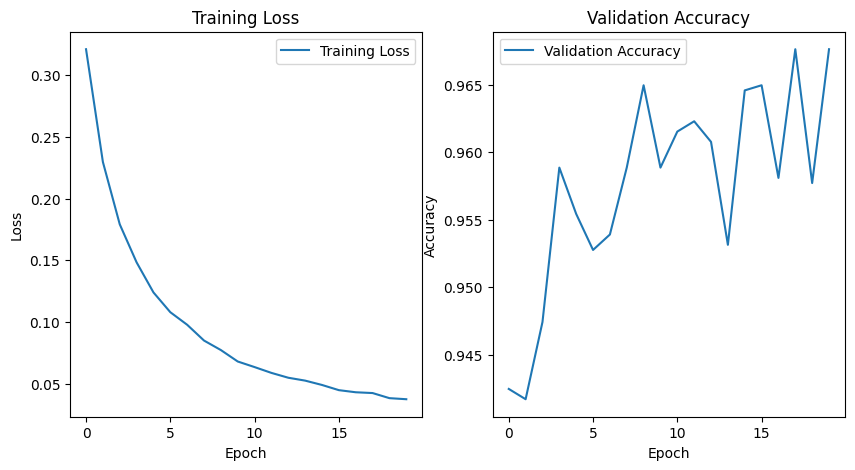

In [15]:
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()